In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
single_img = mnist.train.images[1].reshape(28,28)

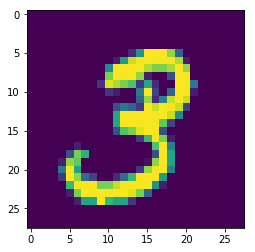

In [14]:
plt.imshow(singles_img)

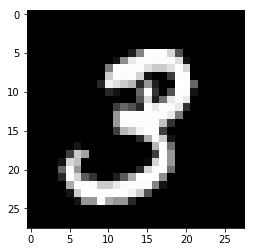

In [15]:
plt.imshow(singles_img,cmap='gist_gray')

In [16]:
singles_img.min()

0.0

In [17]:
singles_img.max()

1.0

In [18]:
#placeholdes
x = tf.placeholder(tf.float32,shape=[None,784])

In [20]:
#variables
#784 inputs X 10 predict label (0..9)
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [21]:
#graph operations
y = tf.matmul(x,W) + b

In [22]:
#loss function
#10 brcausa labels (0..9)
y_true = tf.placeholder(tf.float32,[None,10])

In [23]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [25]:
#optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [27]:
#create session
init = tf.global_variables_initializer()

In [29]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # EVALUATE THE MODEL
    correct_predction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(correct_predction,tf.float32))
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9192
